$\newcommand{\bnabla}{\boldsymbol{\nabla}}$
$\newcommand{\eexp}[1]{\text{e}^{#1}}$
$\newcommand{\di}[0]{\text{d}}$
$\newcommand{\bs}[1]{\boldsymbol{#1}}$
$\newcommand{\ode}[2]{\frac{\di {#1}}{\di {#2}}}$
$\newcommand{\oden}[3]{\frac{\di^{#1} {#2}}{\di {#3}^{#1}}}$
$\newcommand{\odel}[2]{\di {#1}/\di {#2}}$
$\newcommand{\odeln}[3]{\di^{#1} {#2}/\di {#3}^{#1}}$
$\newcommand{\pde}[2]{\frac{\partial {#1}}{\partial {#2}}}$
$\newcommand{\pden}[3]{\frac{\partial^{#1} {#2}}{\partial {#3}^{#1}}}$
$\newcommand{\pdel}[2]{\partial_{#2} {#1}}$
$\newcommand{\pdenl}[3]{\partial^{#1}_{#3} {#2}}$
$\newcommand{\divr}[1]{\vec\nabla \cdot {#1}}$
$\newcommand{\divrb}[1]{\boldsymbol{\nabla} \cdot {#1}}$
$\newcommand{\grad}[1]{\vec \nabla {#1}}$
$\newcommand{\gradb}[1]{\boldsymbol\nabla {#1}}$
$\newcommand{\curl}[1]{\vec\nabla \times {#1}}$
$\newcommand{\curlb}[1]{\boldsymbol{\nabla}\times\boldsymbol{#1}}$
$\newcommand{\lapl}[0]{\vec\nabla^2}$
$\newcommand{\laplb}[0]{\boldsymbol{\nabla}^2}$
$\newcommand{\cplxi}[0]{\text{i}}$
$\newcommand{\unit}[1]{\mathbf{\hat{#1}}}$
$\newcommand{\thrfor}[0]{\quad\Rightarrow\quad}$
$\newcommand{\red}[1]{\textcolor{red}{#1}}$
$\newcommand{\blue}[1]{\textcolor{blue}{#1}}$
$\newcommand{\mage}[1]{\textcolor{magenta}{#1}}$
$\newcommand{\with}[0]{\quad\text{with}\quad}$
$\newcommand{\thrfor}[0]{\quad\Rightarrow\quad}$
$\newcommand{\andeq}[0]{\quad\text{and}\quad}$
$\newcommand{\oreq}[0]{\quad\text{or}\quad}$

In [1]:
from IPython.display import Image, display, YouTubeVideo
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import interactive
from ipywidgets import interact, FloatSlider, fixed
from matplotlib import rcParams
interactive(True)
rcParams['figure.dpi'] = 100  # for crisper figures later

*Readings:*

* *Morin 4.4*
* *French Chapter 4*



# Expectations

## Remember:

* If an oscillator is driven at angular frequency $\omega$, then the oscillator also oscillates at angular frequency $\omega$, no matter what its value of $\omega_0$ and $\gamma$ are.
* If the oscillator is driven at $\omega \approx \omega_0$, then the oscillator resonates, i.e., it amplifies the oscillations of the driver.
* At resonance, the amplitude of the oscillations is approximately equal to the amplitude of the forcing multiplied by $Q$: $A \approx QA_f$,
* When $\omega < \omega_0$, driving and oscillator oscillate in phase (think of the spring that is barely stretched or compressed), when $\omega > \omega_0$, driver and oscillator are in phase opposition, and when $\omega \approx \omega_0$, the oscillator lags the driver by a quarter cycle ($\pi/2$).
* The resonance frequency is exactly $\omega_0$ because it is where the peak in velocity response and power absorption are both located.
* The full width at half height, how to recognize it in a power curve, and that $\omega_{fwhh} \approx \gamma$.
* The trade-off between the amplification that is proportional to $Q$, and the FWHH, which goes as $1/Q$ (recall: $\omega_{fwhh} \approx \gamma = \omega_0/Q$).

## Understand:

* Testing for $x = A \cos(\omega t - \delta)$ is validated by finding expressions for $A$ and $\delta$ that would satisfy the nonhomogeneous ODE.
* How we use the rule that $$ A\cos(\omega t) + B\sin(\omega t) = C \cos(\omega t) \thrfor A = C\quad \textrm{and}\quad B = 0$$
to obtain the curves for $A(\omega)$ and $\delta(\omega)$.
* The connection between the transient and forced responses being superposed, and the mathematical result that the solution to a nonhomogeneous ODE is the sum of the complementary and particular solutions.

## Apply

* See worked examples, tutorials and problem sets.

# Recap of the undamped case

* Reminisce again about what it is to play on a swing set:
    * Drop from a certain angle and stay still on the swing: you are oscillating are the natural angular frequency $\omega_0$, or more realistically, at the damped angular frequency $\omega_d$ (swings sets are popular because damping is not very high, so, $\omega_0 \approx \omega_d$).
    * Move your legs much less frequently than this frequency ($\omega \ll \omega_0$): you don't get very far, and your legs are in phase with your angle, that is, legs forward, you go forward, and vice-versa.
        Your angle has a phase shift $\delta= 0$ with your legs.
        It's hard to realize but if you have a swing set nearby, try it.
    * Move your legs a lot faster such that $\omega \ll \omega_0$ that and once again, you don't go very far.
        Pay real close attention and you will notice that your legs and your position are out-of-phase: your angle has a phase shift $\delta= \pi$ with your legs.
        It's even harder to realize than in the low-frequency case because it's harder to concentrate, but it's true.
    * Move your legs at about $\omega \approx \omega_0\approx \omega_d$ (swings sets are popular because damping is not very high), and you will start going real high.
        Notice that instinctively, you flip the direction of your legs when your position is maximum.
        That is, it is when you are on top of your trajectory, facing the ground, that you flip your legs from below the seat to forward.
        They will be at maximum forward extension when you pass the vertical plane (zero angle), and will keep this 1/4-cycle advance ($\delta = \pi/4$) on your position as long as you resonate.

As tough as the math gets, all the physics you need to understand for now is encapsulated in these scenarios!
Here is a demo though (at at https://youtu.be/Is7shffFJFs), where I repeat these points.

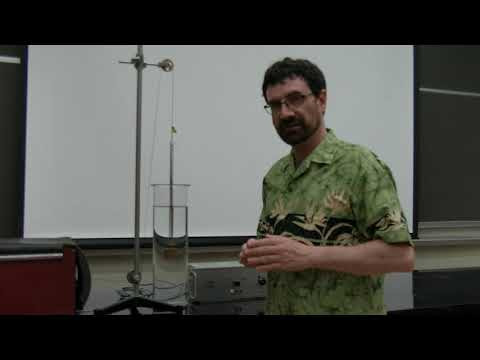

In [19]:
YouTubeVideo('Is7shffFJFs', width=560, height=300)

Mathematically, we determined that we needed to solve an inhomogeneous ODE, with the LHS being the SHO equation, and the RHS being the forcing.
Switching to complex notations, this ODE was
$$ \boxed{\ddot z + \omega_0^2 z = \omega_0^2A_f\eexp{\cplxi\omega t}},$$
with $z \in \mathbb C$ and $\text{Re}(z) = x$.
We let out previous problem adopt an exponential, $z = Z\eexp{rt}$, and found
\begin{equation}
    Z = \frac{\omega_0^2 A_f}{\omega_0^2 - \omega^2}.
    \label{eq:ZinCundamp}
\end{equation}

For **low frequencies**, i.e., $\bs{\omega}$ < $\bs\omega_0$, the response was 
$$x(t) = \text{Re}(z) = A(\omega)\cos(\omega t), \with A(\omega) = \frac{\omega_0^2 A_f}{\omega_0^2 - \omega^2},$$
for **high frequencies**, $\bs{\omega}$ > $\bs\omega_0$, the response was
$$x(t) = \text{Re}(z) = A(\omega)\cos(\omega t - \pi), \with A(\omega) = \frac{\omega_0^2 A_f}{\omega^2 - \omega_0^2},$$
and at **resonance**, the response was
\begin{equation}
    x(t) = \frac12 A_f\omega_0 t \cos\left(\omega_0 t - \frac\pi2\right).
    \label{eq:xResUndamped}
\end{equation}

We didn't derive it so no worries if you don't know where it comes from. The most interesting piece of info was the $-\pi/2$ phase shift, namely, the position is a quarter-cycle behind the forcing, just like on the swing set.
And the second-most interesting piece of info was that the amplitude increased linearly with time, seemingly without end...

... Or not? Let's think about it: as the amplitude gets larger and larger, so does the velocity.
There will come a time when the hypothesis of no damping will be egregiously wrong.
So, let's reintroduce it.

# Driving a damped oscillator

Adding damping adds a few differences with the previous, undamped case.
In short, the mathematically weird stuff in the previous solution gets regularized: the weird jump in phase from $0$ to $\pi$ and the diverging amplitude get a more physical treatment.

You know the drill: FBD with a moving wall, dividing by the mass, rearranging to let the free part of the equation or the LHS and leaving the forcing on the RHS yields
$$ \ddot x + 2\gamma \dot x +\omega_0^2x = \omega_0^2 A_f\cos(\omega t). $$ 

Once again, we will focus on the particular solution, for the same reasons as before.
This is even more justified because with damping, the homogeneous solution would eventually die.
We will come back to it.

Before adopting an exponential, let's move to the complex space,
$$\ddot z + 2\gamma \dot z + \omega_0^2 z = \omega_0^2 A_f \eexp{\cplxi \omega t},$$

Let it adopt an exponential $z = Z\eexp{rt}$ and just like for the undamped case, you quickly obtain
$$r = \pm\cplxi \omega \andeq \left(-\omega^2 +2 \cplxi \gamma \omega + \omega_0^2\right) Z = \omega_0^2 A_f,$$
or
$$Z = \frac{\omega_0^2 A_f}{\omega_0^2 - \omega^2 +2 \cplxi \gamma \omega}.$$
Technically, we solved the problem with this, a computer could just plot the magnitude and phase of this for us.
But let's try to understand this solution with pen-and-paper.

The algebra that follows can be intimidating because the terms are so big, so let me introduce a few intermediate quantities.
Let $p = \omega_0^2 - \omega^2$, $q = 2\gamma\omega$, after which $Z$ becomes
$$Z = \frac{\omega_0^2 A_f}{p+\cplxi q}.$$

The next step is to figure out the magnitude of $Z$, because it will tell us how far the mass goes given a certain forcing, and the phase, and we both know from before that they depend on the driving frequency $\omega$.
So, like before, let's use a polar representation $Z = A(\omega)\eexp{-\cplxi\delta(\omega)}$ and crank the algebra machine up.
The amplitude is the easiest, with
$$|Z| = \frac{\omega_0^2 A_f}{\sqrt{p^2 + q^2}} = \boxed{A(\omega) = \frac{\omega_0^2 A_f}{\sqrt{(\omega_0^2 - \omega^2)^2 + 4\gamma^2 \omega^2}}}.$$
Notice something on the denominator?
Inside the square root, you see the sum of two squared real expressions that are zero for different $\omega$'s, and whose sum is therefore never zero.
The denominator is therefore always positive now, the amplitude never diverges to infinity!

For the phase, I find it easier to decompose $Z/A(\omega)$ into real and imaginary parts to obtain the cos and sin.
This is like finding the real and imaginary parts of the division of two complex numbers, which we saw in lecture 02:
$$Z = \frac{\omega_0^2 A_f}{p + \cplxi q}\frac{p - \cplxi q}{p - \cplxi q} = \frac{\omega_0^2 A_f(p - \cplxi q)}{p^2 + q^2}.$$

To get the cos and sin of the phase, we divide this by $A(\omega)$ to obtain
$$\frac{Z}{A} = \eexp{-\cplxi \delta} = \cos\delta - \cplxi\sin\delta = \frac{p}D - \cplxi \frac{q}{D}.$$
Because $p$, $q$ and $D$ are all real, identifying the real and imaginary parts is easy, it's just
$$\cos\delta = \frac{p}{\sqrt{p^2 + q^2}} \andeq \sin\delta = \frac{q}{\sqrt{p^2 + q^2}}.$$

Before unpacking what will probably be a voluminous expression, let's see if the tangent of the phase would be enough.
I am educating this guess with two pieces of information:
* In the undamped case, the phase was 0 or $\pi$. We could hope that our phase would be in the same $[0, \pi)$ bracket, and therefore the knowledge of $\cos\delta$, $\sin\delta$ or $\tan\delta$ alone would be enough to know $\delta$.
* I already know the answer: it works.

After all of this tension, let us reveal the phase shift with respect to the forcing, namely,
$$\tan \delta = \frac{\sin\delta}{\cos\delta} = \frac qp = \frac{2\gamma \omega}{\omega_0^2 - \omega^2} \thrfor \boxed{\delta(\omega) = \arctan\left(\frac{2\gamma\omega}{\omega_0^2 - \omega^2}\right)}.$$

Notice that the denominator isn't defined when $\omega_0 = \omega$.
That's OK, just recall that when $\omega = \omega_0$, $p = 0$, and therefore,
$\cos\delta(\omega=\omega_0) =0$, $\sin\delta(\omega = \omega_0) = q/\sqrt{0^2 +q^2} = +1$, and therefore, $\delta = \pi/2$... like on the swing set, again!

We now have everything we need to plot the solution $x = A(\omega)\cos\left[\omega - \delta(\omega)\right]$.

# Varying the forcing frequency


| Feature | $A(\omega)/A_f$ | $\tan[\delta(\omega)]$ | $\delta(\omega)$ |
| :----------------: | :----------------: | :----------------: | :----------------: |
| Expression | $\frac{\omega^2_0}{\sqrt{\gamma^{2} \omega^{2} + (\omega_{0}^{2} - \omega^{2})^2}}$ | $\frac{\gamma \omega }{\omega_{0}^{2} - \omega^{2}}$ | $\arctan\left(\dots\right)$ |
| Non-dimensional ($\varpi = \omega/\omega_0$) | $\frac{1}{\sqrt{\varpi^{2}/Q^2 + (1 - \varpi^{2})^2}}$ | $\frac1Q\frac{\varpi }{1 - \varpi^{2}}$ | $\arctan\left(\dots\right)$ |
| $\lim_{\omega \to 0}$ | 1 | 0 | 0 |
| $\lim_{\omega \to \infty}$ | 0 | 0$_-$ | $\pi$ |
| $\omega = \omega_0$ | $\frac{\omega_0}{\gamma} = Q$ | $+\infty$ | $\pi/2$ |

*Note: the table above looks all garbled on my notebook.*

# Summary

In this lecture, we saw the following.

* How adding a bit of friction changes the equation of motion of a free oscillator and the shape of the solutions, but how "adopt-an-exponential" still works fine.
* How there are three regimes when there is friction: underdamped (keeps oscillating but decays), overdamped (does not oscillate; friction is so large that the system barely moves, takes a while to decay), and critical (in-between case; fastest return to zero).
* Definition of the $Q$-factor, which compares how fast a system oscillates (if it oscillates) vs. how fast it decays.
* Driving an oscillator yields a response at the driving frequency, not the natural frequency.
    The amplitude is maximum when the two match (actually, without damping, it diverges), and there might be phase shifts between forcing a response.